In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.stats as st

In [15]:
df = pd.read_csv ("C:\\Users\\julie\\Desktop\\customer_behaviour.csv", sep = ";", index_col = "Unnamed: 0")

In [28]:
df ["..."].nunique()

1

In [29]:
df = df.drop(df.index[0])
df = df.drop(["..."], axis = 1)
print(df.shape)
print(df.info())
print(df.describe())

(115, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 13 to 206209
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   alcohol          115 non-null    float64
 1   babies           115 non-null    float64
 2   bakery           115 non-null    float64
 3   beverages        115 non-null    float64
 4   breakfast        115 non-null    float64
 5   bulk             115 non-null    float64
 6   canned goods     115 non-null    float64
 7   dairy eggs       115 non-null    float64
 8   deli             115 non-null    float64
 9   dry goods pasta  115 non-null    float64
 10  household        115 non-null    float64
 11  international    115 non-null    float64
 12  meat seafood     115 non-null    float64
 13  missing          115 non-null    float64
 14  other            115 non-null    float64
 15  pantry           115 non-null    float64
 16  personal care    115 non-null    float64
 17  pets   

In [31]:
pca = PCA()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
Coord = pca.fit_transform(df_scaled)

In [34]:
explained_variance = pca.explained_variance_ratio_

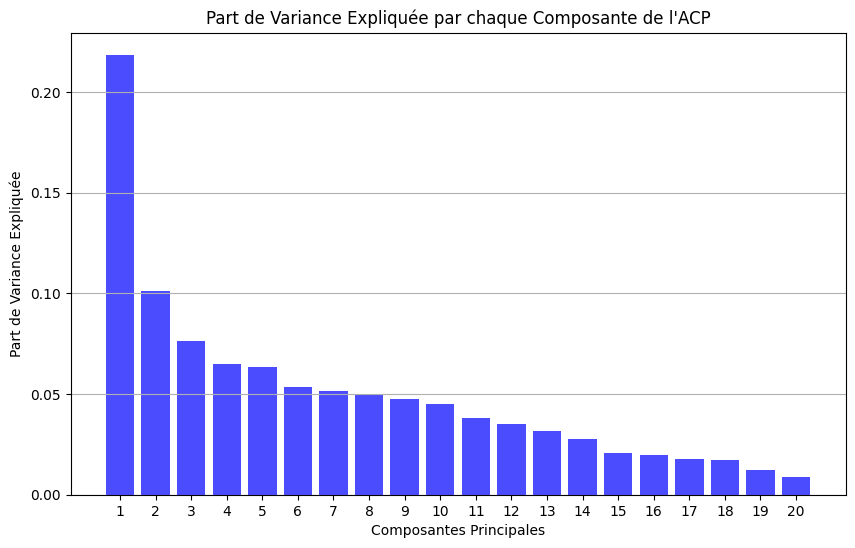

In [35]:
components = np.arange(1, len(explained_variance) + 1)

plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance, alpha=0.7, color='blue')
plt.xticks(components)
plt.xlabel('Composantes Principales')
plt.ylabel('Part de Variance Expliquée')
plt.title('Part de Variance Expliquée par chaque Composante de l\'ACP')
plt.grid(axis='y')
plt.show()

In [36]:
explained_variance_grouped = np.concatenate([explained_variance[:4], [1 - explained_variance[:4].sum()]])
labels = [f'Axe {i+1}' for i in range(4)] + ['Autres axes']

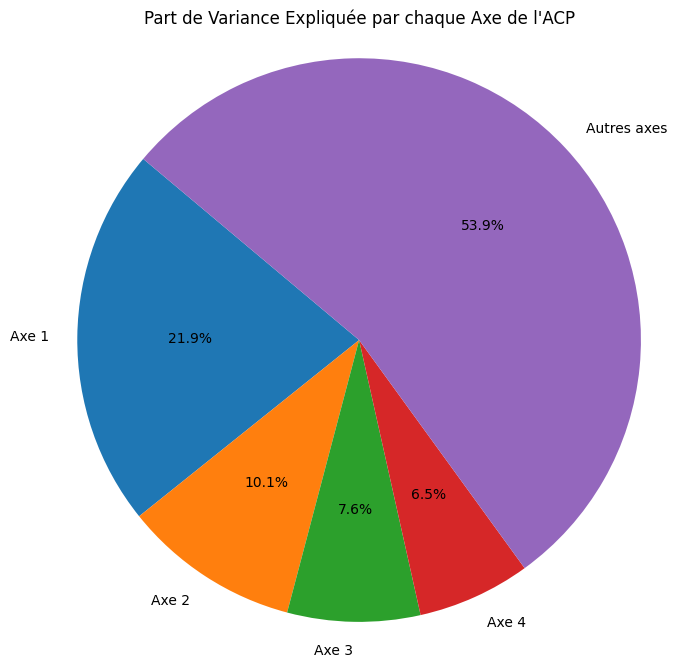

In [37]:
# Afficher le camembert
plt.figure(figsize=(8, 8))
plt.pie(explained_variance_grouped, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Part de Variance Expliquée par chaque Axe de l\'ACP')
plt.axis('equal')  # Pour que le camembert soit un cercle
plt.show()

In [38]:
cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.where(cumulative_variance >= 0.9)[0][0] + 1  # Nombre de composantes pour 90% de variance
optimal_components

np.int64(14)

In [39]:
# Supposons que Coord_2 soit un DataFrame avec des données en deux dimensions
# Pour l'exemple, nous générons des données aléatoires
np.random.seed(0)
Coord_2 = np.random.rand(100, 2)  # 100 échantillons, 2 dimensions

In [40]:
# Liste pour stocker les valeurs d'inertie
inertie = []

# Exécuter KMeans pour k = 1 à 8
k_values = range(1, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Coord_2)
    inertie.append(kmeans.inertia_)

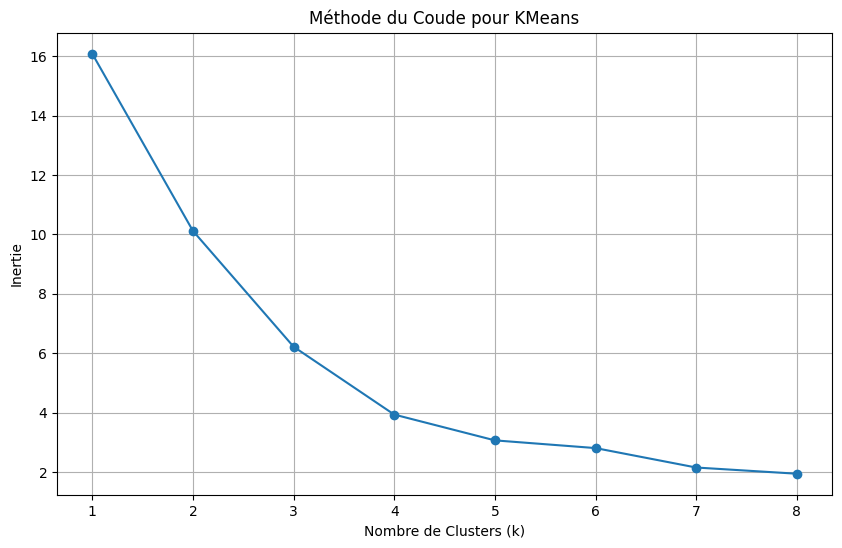

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertie, marker='o')
plt.title('Méthode du Coude pour KMeans')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Inertie')
plt.xticks(k_values)
plt.grid()
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(Coord_2)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

KMeans(n_clusters=5, random_state=42)

Étiquettes des clusters : [1 1 1 4 3 3 4 2 4 3 3 4 4 4 1 4 1 4 1 3 1 0 1 2 2 1 0 2 0 0 2 0 2 0 0 3 3
 0 2 2 2 4 0 0 4 4 4 2 0 0 0 3 4 1 4 4 0 0 3 3 1 3 1 2 0 1 2 1 1 1 0 4 3 4
 3 4 4 4 3 2 1 3 3 2 0 0 2 0 4 0 4 0 3 1 0 2 4 1 2 2]
Centres des clusters : [[0.70302442 0.17686305]
 [0.57315631 0.54581103]
 [0.2113799  0.22237198]
 [0.87192901 0.6955762 ]
 [0.24825285 0.80107959]]


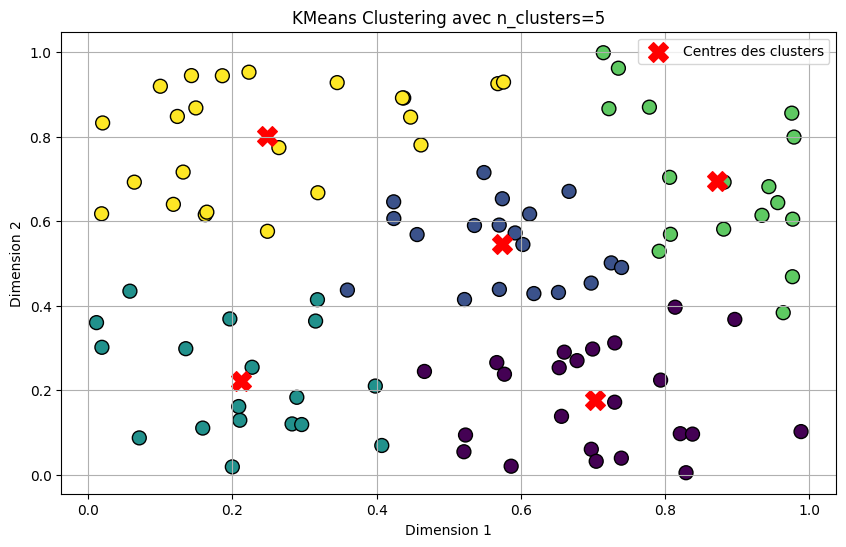

In [43]:
print("Étiquettes des clusters :", labels)
print("Centres des clusters :", centers)

plt.figure(figsize=(10, 6))
plt.scatter(Coord_2[:, 0], Coord_2[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centres des clusters')
plt.title('KMeans Clustering avec n_clusters=5')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid()
plt.show()

In [44]:
scaler = StandardScaler()
Coord_2_normalized = scaler.fit_transform(Coord_2)


In [45]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(Coord_2_normalized)

In [46]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [47]:
kmeans.fit(principal_components)

KMeans(n_clusters=5, random_state=42)

       AXE1      AXE2  cluster
0 -0.477699  0.652706        1
1  0.079443  0.366533        1
2 -0.620444  0.166827        1
3 -1.194222  0.810582        4
4  1.385481  0.873151        3


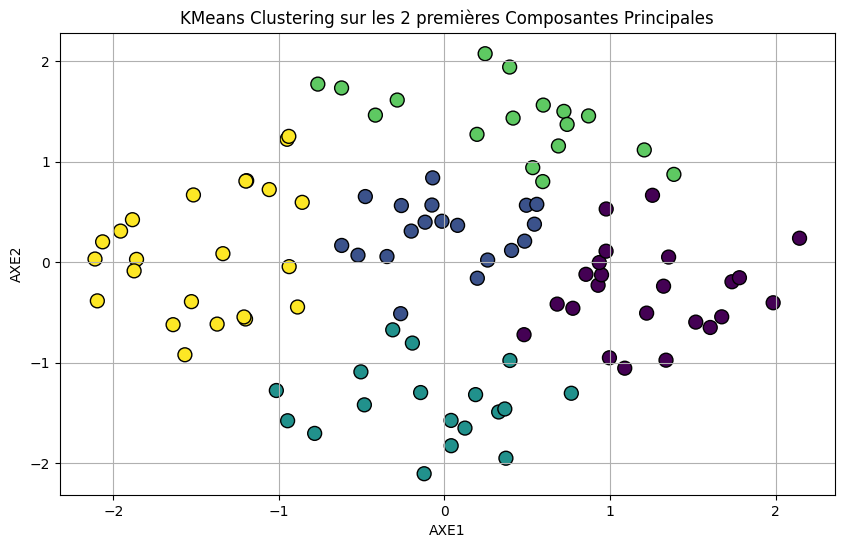

In [53]:
# Créer le DataFrame avec les coordonnées des 2 premières composantes et les numéros de cluster
kmeans_mat = pd.DataFrame(data=principal_components, columns=['AXE1', 'AXE2'])
kmeans_mat['cluster'] = labels

# Afficher le DataFrame
print(kmeans_mat.head())

# Optionnel : Visualiser les clusters sur les deux premières composantes
plt.figure(figsize=(10, 6))
plt.scatter(kmeans_mat['AXE1'], kmeans_mat['AXE2'], c=kmeans_mat['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('KMeans Clustering sur les 2 premières Composantes Principales')
plt.xlabel('AXE1')
plt.ylabel('AXE2')
plt.grid()

In [49]:
distances = np.linalg.norm(principal_components - centers[labels], axis=1)

In [50]:
kmeans_mat = pd.DataFrame(data=principal_components, columns=['AXE1', 'AXE2'])
kmeans_mat['cluster'] = labels
kmeans_mat['distance_to_centroid'] = distances

In [51]:
anomaly_coordinates = kmeans_mat.nlargest(300, 'distance_to_centroid')

In [52]:
print(anomaly_coordinates.head())

        AXE1      AXE2  cluster  distance_to_centroid
8  -2.095906 -0.384014        4              2.626695
17 -1.567218 -0.919877        4              2.501525
73 -2.110042  0.031974        4              2.480540
13 -2.064097  0.202635        4              2.388534
41 -1.638598 -0.620683        4              2.362544


In [54]:
df_item = pd.DataFrame(df, columns=['nb_items'])


In [57]:
seuil = 50
filtered_data = df_item[df_item['nb_items'] < seuil]['nb_items']
lambda_estimate = 1 / np.mean(filtered_data)
x = np.linspace(0, 20, 100)  # Domain de x pour la fonction de densité
pdf = lambda_estimate * np.exp(-lambda_estimate * x)

c:\Users\julie\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\julie\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


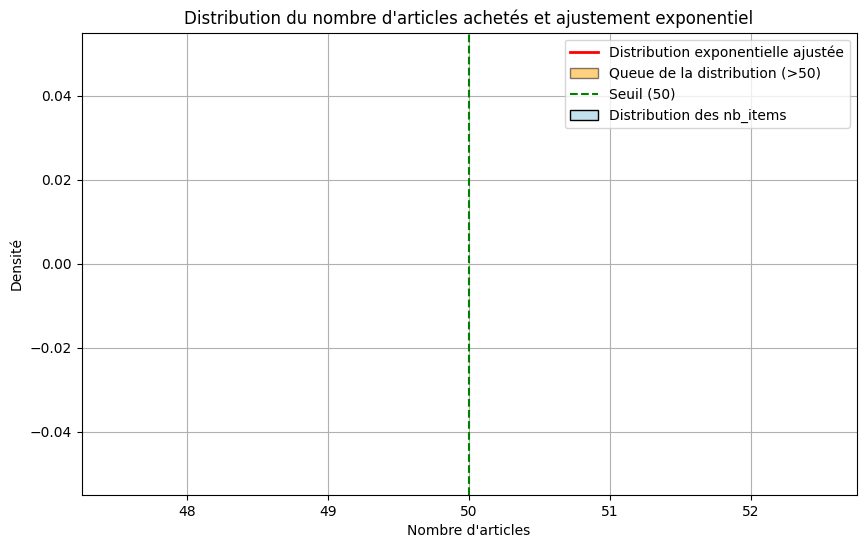

In [58]:
# Visualiser les résultats
plt.figure(figsize=(10, 6))

# Histogramme des données avec seuil
sns.histplot(df_item['nb_items'], bins=20, color='lightblue', stat='density', label='Distribution des nb_items', kde=False)

# Tracer la distribution exponentielle
plt.plot(x, pdf, 'r-', lw=2, label='Distribution exponentielle ajustée')

# Tracer les valeurs supérieures au seuil
plt.hist(filtered_data, bins=20, density=True, alpha=0.5, color='orange', label='Queue de la distribution (>50)', edgecolor='black')

plt.title('Distribution du nombre d\'articles achetés et ajustement exponentiel')
plt.xlabel('Nombre d\'articles')
plt.ylabel('Densité')
plt.axvline(seuil, color='green', linestyle='--', label='Seuil (50)')
plt.legend()
plt.grid()
plt.show()